In [1]:
# Generate QR code
import qrcode

In [2]:
# Create image
def generate(data,img_name=None):
    img=qrcode.make(data)
    if img_name!=None:
        img.save("./img/{}".format(img_name))
    return img

In [3]:
# Generating simple number sequence
def r(x):
    return "".join([str(i) for i in range(x+1)])

In [4]:
r(50)

'01234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950'

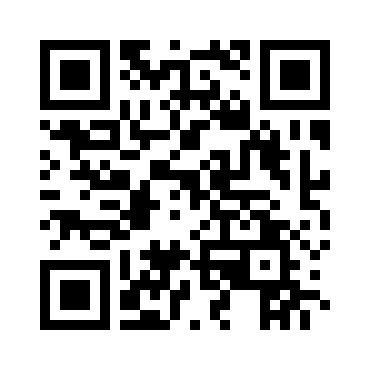

In [5]:
# QR code containing string number sequence 0-50
generate(r(50),"r50")

In [6]:
# generate(r(1000),"r1000")

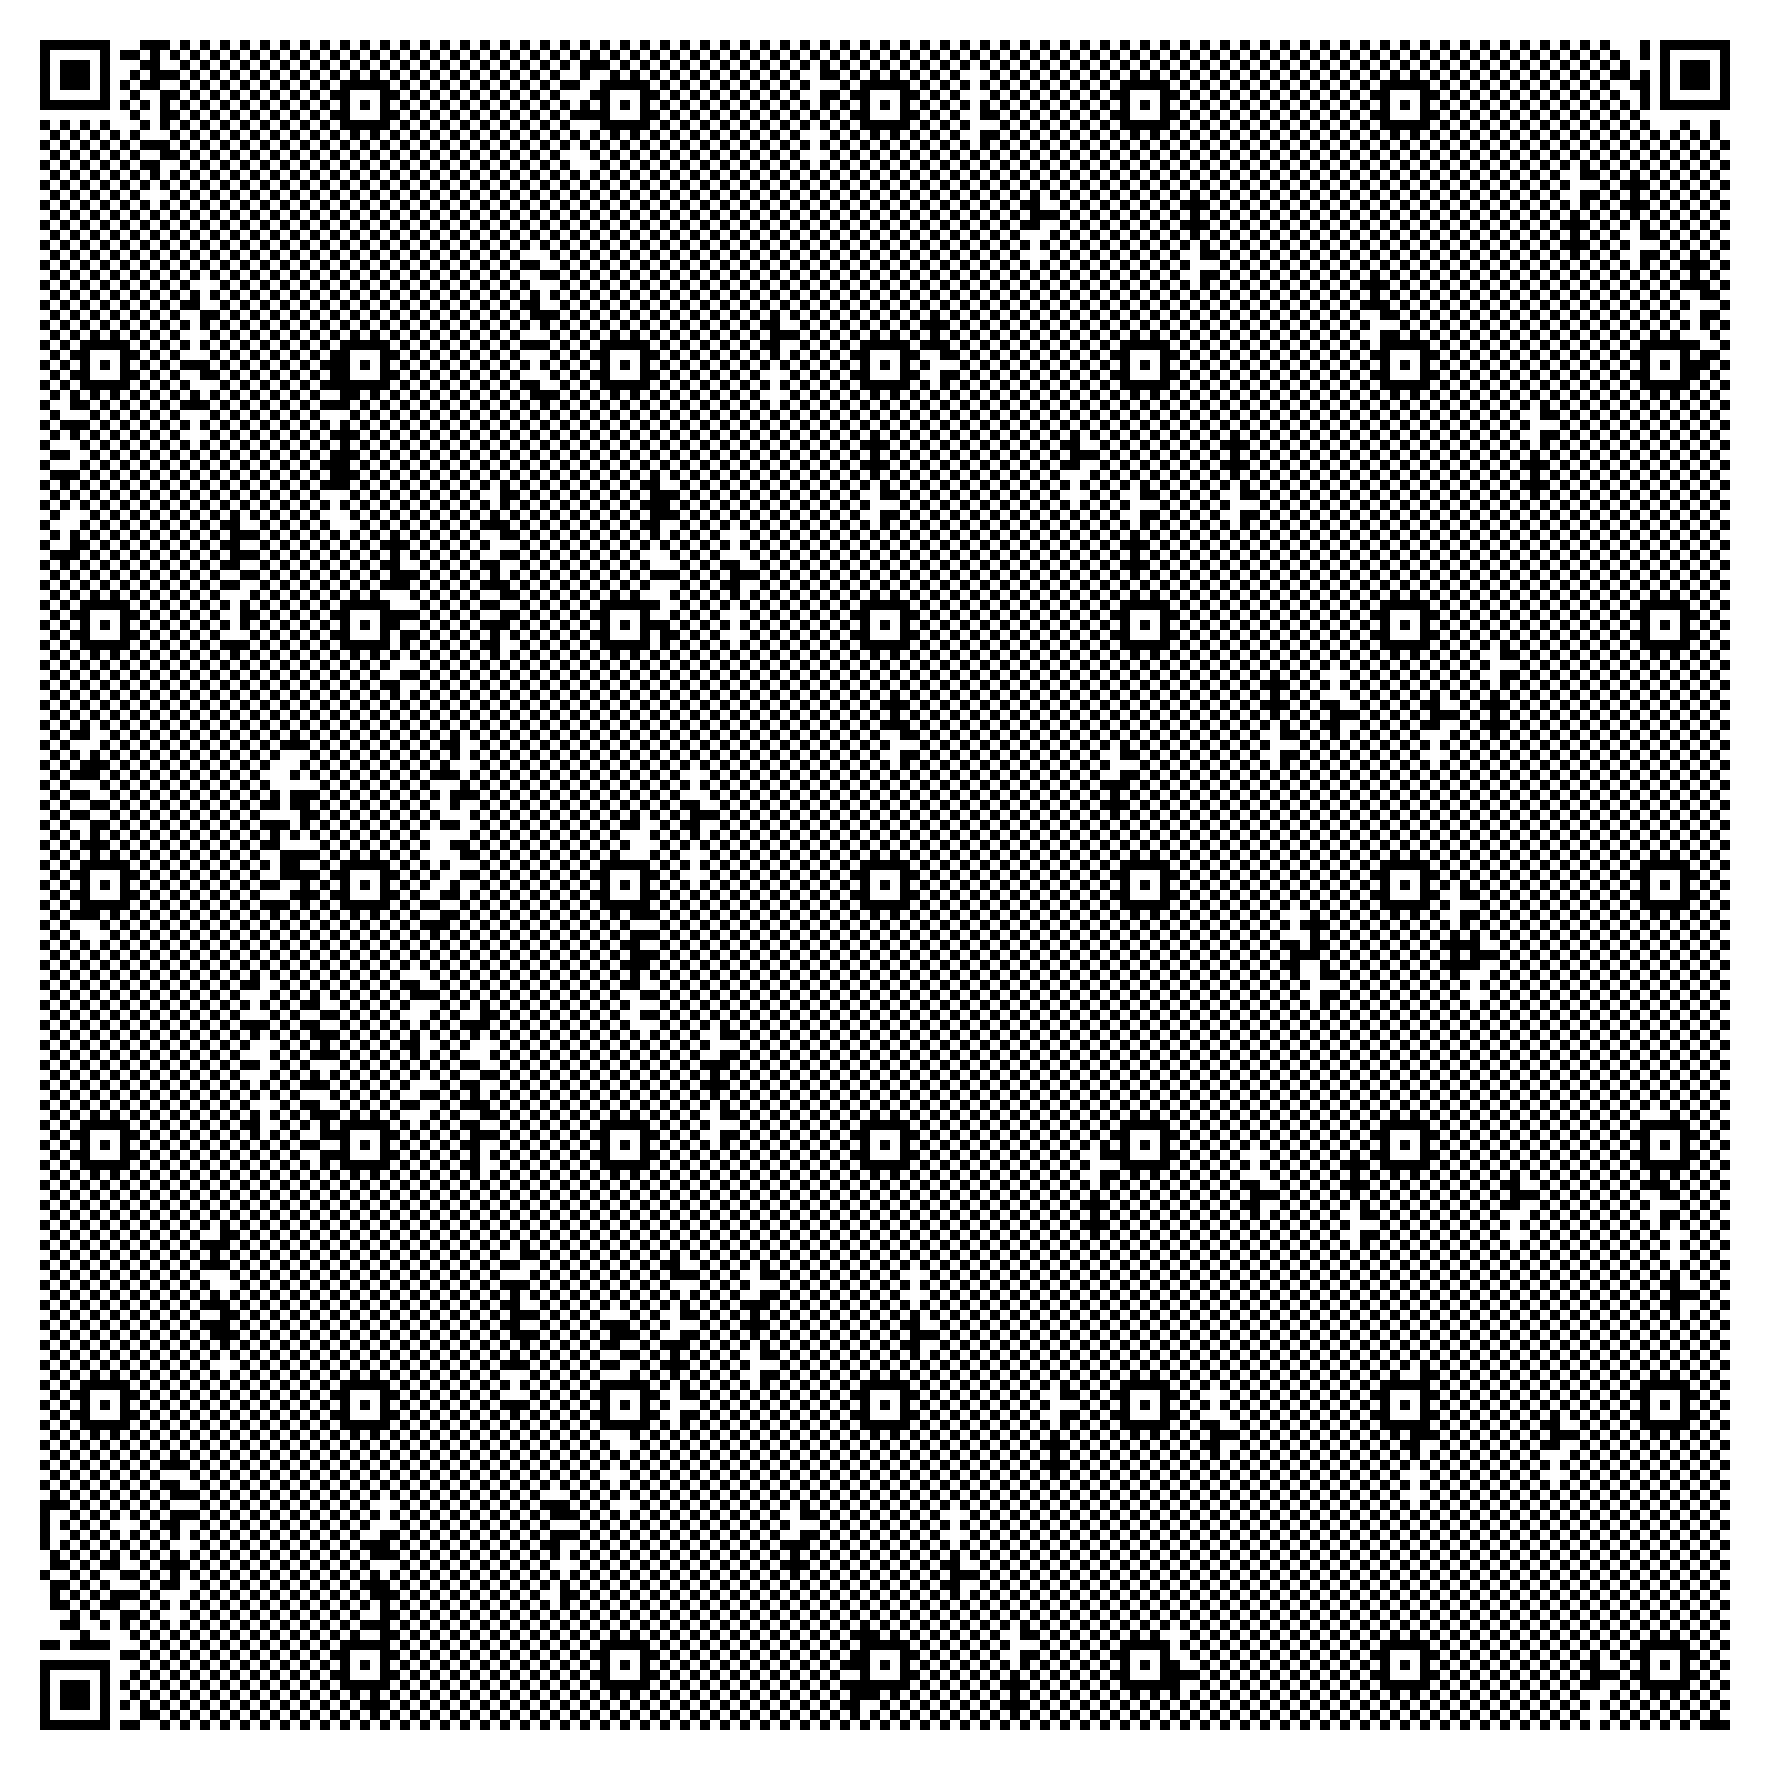

In [36]:
# Null data
generate("\x00"*2000,"f")

In [8]:
# open("./img/r50","rb").read()

In [9]:
# Reading QR code from image
import cv2

In [10]:
# x -> image name
def output_data(x):
    detector = cv2.QRCodeDetector()
    img = cv2.imread(x)
    return detector.detectAndDecode(img)

In [32]:
# Data decoded from QR code                         | data
# Array of vertices of the found QR code quadrangle | bbox
# Rectified and binarized QR code                   | straight_qrcode

def read(x):
    data, bbox, straight_qrcode=output_data(x)
    if bbox is None:
        return False
    return data

In [39]:
generate(r(103),"r103")

len(read("./img/r103"))
# From observations it seems to return empty string (data="") when:
# it exceeds 202 bytes

202